In [1]:
!pip install sentence_transformers
!pip install transformers

     |████████████████████████████████| 78 kB 3.0 MB/s 
     |████████████████████████████████| 3.1 MB 24.4 MB/s 
     |████████████████████████████████| 3.3 MB 37.4 MB/s 
     |████████████████████████████████| 1.2 MB 54.5 MB/s 
     |████████████████████████████████| 61 kB 518 kB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 895 kB 53.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=74e5814a3b5e3d8a31aa740aa83fbdd0de321deaf7ad440c876b57a283a63f66
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from google.colab import drive
drive.mount('/content/gdrive') # for google colab. adjust accordingly

PARENT_DIR = '/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/' # for google colab. adjust accordingly

import sys
sys.path.append(PARENT_DIR)

!pip install spacy
!python -m spacy download de_core_news_sm

import sys  
sys.path.insert(0, PARENT_DIR)

Mounted at /content/gdrive
     |████████████████████████████████| 14.9 MB 1.0 MB/s 
  Created wheel for de-core-news-sm: filename=de_core_news_sm-2.2.5-py3-none-any.whl size=14907055 sha256=796107bb86093cf5fd97f805b9a2eccd1683d3b71c742647fc5e66066d9dfc30
  Stored in directory: /tmp/pip-ephem-wheel-cache-1rrr_jl2/wheels/00/66/69/cb6c921610087d2cab339062345098e30a5ceb665360e7b32a
Successfully built de-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')


In [3]:
from similarity_load_data import *

In [4]:
_, mt_val_ds, mt_test_ds, mt_train_dl, mt_val_dl, mt_test_dl = load_pickled_dataloaders()

In [5]:
with open(PARENT_DIR+'data/dataloaders10perc_batchsize32/mt_train_ds_tokenize2.pickle', 'rb') as handle:
    mt_train_ds = pickle.load(handle)

with open(PARENT_DIR+'data/dataloaders10perc_batchsize32/mt_train_dl_tokenize2.pickle', 'rb') as handle:
    mt_train_dl = pickle.load(handle)

In [ ]:
iterator = iter(mt_train_ds)


In [ ]:
next(iterator)

(tensor([   2,   29,  274,   12,    0,   23, 3934,   14,  103,    3]),
 tensor([   2,   23,   16,    4,  968,    7,  392, 4354,   11, 2905,    3]),
 tensor([0, 1, 2, 1, 3, 4, 5, 6, 2, 0]),
 tensor([0, 1, 2, 7, 5, 4, 2, 5, 4, 8, 0]),
 'was bedeutet es menü auf arabisch zu sagen')

In [ ]:
next(iterator)

(tensor([   2,   24,  123, 3510,    0,    0,    9,   47,   13,    0,   10,   48,
           15,  583,    0,   35, 2620,  516,   37,   42,  549, 2621,   17, 4537,
           14, 1673,    3]),
 tensor([   2,   25,   12,  482,   59,   36, 2906,    0,    0,   64,   16,   71,
           33,    0,   85,  809,    8,  109,  298,    7, 1841,   21, 1354, 1221,
           45,  228,    3]),
 tensor([ 0,  9,  7,  5,  8,  8,  7, 10,  4,  8, 11, 11,  7,  3,  5,  4,  5,  2,
          4,  7,  5,  4,  4,  5,  6,  2,  0]),
 tensor([ 0,  9,  1,  2,  4,  7,  5,  8,  8,  1,  2, 10,  4,  8, 11,  2,  7,  3,
          5,  4,  5,  4,  2,  5,  4,  5,  0]),
 'aber mein kollege pieter abbeel der hier in berkeley ist hat ein neues set an techniken entwickelt um einen roboter anhand von beispielen zu unterrichten')

In [ ]:
# with open(PARENT_DIR+'data/dataloaders10perc_batchsize32/mt_train_ds_tokenize2.pickle', 'wb') as handle:
#     pickle.dump(mt_train_ds, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open(PARENT_DIR+'data/dataloaders10perc_batchsize32/mt_train_dl_tokenize2.pickle', 'wb') as handle:
#     pickle.dump(mt_train_dl, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
  # train_dict, val_dict, test_dict = load_dictionaries(small = True)


In [11]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('T-Systems-onsite/cross-en-de-roberta-sentence-transformer')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/541 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [12]:
model.eval() #check if it's different

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: XLMRobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [ ]:
next(iter(mt_train_dl))

(tensor([[  2,  30,  11,  12,  70, 396,  11,  12,   4,  12, 414,  90, 716,  17,
           40,   0, 854,   3]]),
 tensor([[   2,   54,   14,   69,   12,   14, 1097,   12,    5,   12,  735,    4,
            88,   14,   63,   31,   23,   15,    0,   23,   15,  355,    3]]),
 tensor([[ 0, 12,  1,  1,  2,  2,  1,  1,  9,  1,  2,  7,  5,  4,  7,  3,  3,  0]]),
 tensor([[ 0, 10,  1,  2,  1,  1,  2,  1,  9,  1,  2,  7,  5,  1,  2,  4,  1, 11,
           3,  1, 11,  3,  0]]))

# Getting hidden states. K = 2. No need to rerun

In [ ]:
# 2. key: hidden states, value: the corresponding batch
h_batch = dict()
for b in mt_train_ds:
  h = torch.tensor(model.encode(b[-1]))
  h_batch[h] = b[:2]
  
  
print('size of this dictionary of hidden states:',len(h_batch))


NameError: ignored

In [ ]:
print('size of this dictionary of hidden states:',len(h_batch))

In [ ]:
# 3. do Kmeans.
K_value = 10

import numpy as np
from sklearn.cluster import KMeans
X = [hs.tolist() for hs in h_batch.keys()]
X1 = np.array(X)
kmeans = KMeans(n_clusters = K_value, random_state = 0).fit(X1)
lab = kmeans.labels_
print(lab)

In [ ]:
# 4. create another dictionary to hold labels with each batch (row)
# key: batch (t1,t2), which is the value of h_batch, value: labels
batch_label = dict() 
for i,_ in enumerate(h_batch): #key: hidden states, value: the corresponding batch
  # i is the number
  batch_label[list(h_batch.values())[i]] = lab[i]


In [ ]:
with open(PARENT_DIR+'data/dataloaders10perc_batchsize32/mt_train_batch_label.pickle', 'wb') as handle:
    pickle.dump(batch_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# 5. create dataloaders from that new dictionary
def create_dataloaders(batch_label):
  allloaders = []
  for i in range(K_value):
    # create groups
    a = {key: value for key, value in batch_label.items() if value == i}
    print('The',i,'th group has length of ',len(a))
    # group to dataloader
    datalo = torch.utils.data.DataLoader(list(a),batch_size = 1, shuffle = True)
    # store in a list
    allloaders.append(datalo)
  return allloaders #exp: [mt_val_dl1, mt_val_dl0]

dls = create_dataloaders(batch_label)

In [ ]:
# 6. save dataloaders dls

with open(PARENT_DIR+'data/dataloaders10perc_batchsize32/mt_train_dataloaders.pickle', 'wb') as handle:
    pickle.dump(dls, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Training loops

In [13]:
import pickle
from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch import nn, optim
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.utils.data import DataLoader, Dataset
from torch.distributions.beta import Beta

from torchtext.data.metrics import bleu_score

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokenizer = nltk.RegexpTokenizer(r"\w+")

from tqdm import tqdm

from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss

from EncoderLSTM import EncoderLSTM
from DecoderLSTM import DecoderLSTM

from train import train

from Seq2Seq import Seq2Seq

from random import randrange
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
with open(PARENT_DIR+'data/dataloaders10perc_batchsize32/mt_train_dataloadersK2.pickle', 'rb') as handle:
    dls = pickle.load(handle)

In [10]:
# draw 2 sentences from the same cluster

# take from dls[0]
b1 = next(iter(dls[1]))
b2 = next(iter(dls[1]))

# list out keys and values separately
key_list = list(mt_train_ds.target_vocab.keys())
val_list = list(mt_train_ds.target_vocab.values())
 
# print key with val 100
sent = ''
for b in b1[1][0]:
  position = val_list.index(b)
  word = key_list[position]
  sent = sent + ' '+ word
print(sent)

# list out keys and values separately
key_list_german = list(mt_train_ds.source_vocab.keys())
val_list_german = list(mt_train_ds.source_vocab.values())
sent = ''
for b in b1[0][0]:
  position = val_list_german.index(b)
  word = key_list_german[position]
  sent = sent + ' '+ word
print(sent)


sent = ''
for b in b2[1][0]:
  position = val_list.index(b)
  word = key_list[position]
  sent = sent + ' '+ word
print(sent)

 <BOS> you know i just showed you this presentation everything looks so good everything works actually no these technologies really are not that easy <EOS>
 <BOS> wissen sie wenn ich ihnen hier diese präsentation zeige sieht alles so gut aus alles funktioniert nicht wirklich diese technologien funktionieren nicht so einfach <EOS>
 <BOS> i seem to <UNK> about every 15 minutes <EOS>


In [14]:
def train(dataloaders, #1)
          similarity,
          encoder, 
          train_ds: Dataset, 
          train_dl: DataLoader, 
          val_ds: Dataset, 
          val_dl: DataLoader, 
          device, bos_idx, eos_idx, path, overwrite = True, epochs: int = 20, hidden_size = 512, padding_idx = 1, lr = 0.001, weight_decay = 1e-4,
          full_loss = False, augmentation_type = None, accum_iter = 32):
    
    if not os.path.isdir(path):
      print('creating directory', path)
      os.mkdir(path)
    else:
      print('directory already exists')
      print(path, 'contains', os.listdir(path))
      if overwrite:
        print('continuing anyways... some files may be overwritten')
      else:
        print('set overwrite = True to continue')
        return None

    if not path.endswith('/'):
      path = path + '/'

    # initialize model, optimizer, and loss functon
    model = Seq2Seq(encoder, device, len(train_ds.source_vocab), len(train_ds.target_vocab), 
                    hidden_size = hidden_size, padding_idx = padding_idx, augmentation_type = augmentation_type).to(device)
    optimizer = Adam(params = model.parameters(), lr = lr, weight_decay = weight_decay)
    if augmentation_type == 'seqmix_pos_ind' or augmentation_type == 'seqmix_pos_ind_r' or augmentation_type == 'seqmix_ind'  or augmentation_type == 'seqmix_ind_2' or augmentation_type == 'seqmix_pos_ind_r' or augmentation_type == 'seqmix_pos2' or augmentation_type == 'seqmix_ind_pos':
        loss_fn_seqmix_ind = CrossEntropyLoss(ignore_index = padding_idx, reduce = False)
        # loss_fn_seqmix_ind = label_smoothed_nll_loss(epsilon = 0.1, ignore_index = padding_idx, reduce = False)

        loss_fn = CrossEntropyLoss(ignore_index = padding_idx)
    else:
        loss_fn = CrossEntropyLoss(ignore_index = padding_idx)
        
    # keep track of losses
    losses = {
        'train': [], 
        'val': []
    }

    val_bleus = []
    model_paths = []

    # if augmentation_type == 'seqmix' or augmentation_type == 'seqmix_lenmatch' or augmentation_type == 'seqmix_ind'  or augmentation_type == 'seqmix_ind_2' or augmentation_type == 'seqmix_pos' or augmentation_type == 'seqmix_pos_ind' or augmentation_type == 'seqmix_pos_ind_r' or augmentation_type == 'seqmix_pos2' or augmentation_type == 'seqmix_ind_pos':
    #   #mix_dl = iter(train_dl) #3)
    #     pass #5)\
    mix_dl = None
    for e in range(epochs):
        running_loss = 0
        for j in range(len(dataloaders)): #2)
          if similarity and mix_dl == None:
              mix_dl = iter(dataloaders[j])
          elif (not similarity) and mix_dl == None:
              if j != 0:
                mix_dl = iter(dataloaders[0])
              else:
                mix_dl = iter(dataloaders[1])
          for batch_idx, batch in enumerate(tqdm(dataloaders[j], leave = False)):            
              if augmentation_type == 'seqmix' or augmentation_type == 'seqmix_lenmatch' or augmentation_type == 'seqmix_pos' or augmentation_type == 'seqmix_pos_ind' or augmentation_type == 'seqmix_ind'  or augmentation_type == 'seqmix_ind_2' or augmentation_type == 'seqmix_ind_pos' or augmentation_type == 'seqmix_pos_ind_r' or augmentation_type == 'seqmix_pos2':
                # mixer_batch = next(iter(train_dl))
                try:
                    mix_batch = next(mix_dl)
                except:
                    if similarity:
                      mix_dl = iter(dataloaders[j])
                      mix_batch = next(mix_dl)
                    else:
                      list2 = list(range(j)) + list(range(j, len(dataloaders)))
                      g = list2[random.randint(0,len(list2)-1)]
                      mix_dl = iter(dataloaders[g])
                      mix_batch = next(mix_dl)
                  
                # mix_batch = next(iter(dls[j]))
                
                # ### experiment: similar length for seqmix
                # if augmentation_type == 'seqmix_lenmatch':
                #     param = 0
                #     while abs((len(mix_batch[0][0])- len(batch[0][0])) > param) or torch.equal(batch[0][0], mix_batch[0][0]):
                #         try:
                #             mix_batch = next(mix_dl)
                #         except StopIteration:
                          
                #             mix_dl = iter(train_dl)
                #             mix_batch = next(mix_dl)
                #             param = param + 1
                #             if param > 10:
                #                 param += 40
              
                input_batch = pad_sequence([batch[0][0],mix_batch[0][0]], batch_first=True, padding_value=padding_idx)
                target_batch = pad_sequence([batch[1][0],mix_batch[1][0]], batch_first=True, padding_value=padding_idx)
                if augmentation_type == 'seqmix' or augmentation_type == 'seqmix_lenmatch':
                    pred, targ, lambda_ = model(input_batch[0].unsqueeze(0).to(device), target_batch[0].unsqueeze(0).to(device), seqmix_batch = (input_batch[1].unsqueeze(0).to(device), target_batch[1].unsqueeze(0).to(device)))
                    
                    l = seqmix_loss(loss_fn, pred, targ, padding_idx, lambda_)
                elif augmentation_type == 'seqmix_pos':
                    
                    pred, targ, lambda_ = model(input_batch[0].unsqueeze(0).to(device), target_batch[0].unsqueeze(0).to(device), seqmix_batch = (input_batch[1].unsqueeze(0).to(device), target_batch[1].unsqueeze(0).to(device)), input_pos = (batch[2].to(device), batch[3].to(device)), mix_pos = (mix_batch[2].to(device), mix_batch[3].to(device)), seqmix_pos = True)

                    l = seqmix_loss(loss_fn, pred, targ, padding_idx, lambda_)

                elif augmentation_type == 'seqmix_pos_ind_r':
                    pred, targ = model(input_batch[0].unsqueeze(0).to(device), target_batch[0].unsqueeze(0).to(device), seqmix_batch = (input_batch[1].unsqueeze(0).to(device), target_batch[1].unsqueeze(0).to(device)), input_pos = (batch[2].to(device), batch[3].to(device)), mix_pos = (mix_batch[2].to(device), mix_batch[3].to(device)), seqmix_pos_ind = True)
                    
                    l = loss_fn(pred, targ)

                elif augmentation_type == 'seqmix_pos_ind' or augmentation_type == 'seqmix_pos2':
                    pred, targ, lambda_targ = model(input_batch[0].unsqueeze(0).to(device), target_batch[0].unsqueeze(0).to(device), seqmix_batch = (input_batch[1].unsqueeze(0).to(device), target_batch[1].unsqueeze(0).to(device)), input_pos = (batch[2].to(device), batch[3].to(device)), mix_pos = (mix_batch[2].to(device), mix_batch[3].to(device)), seqmix_pos_ind = True)
                    
                    l = seqmix_ind_loss(pred, targ, target_batch[0], target_batch[1], padding_idx, lambda_targ)

                elif augmentation_type == 'seqmix_ind' or augmentation_type == 'seqmix_ind_2':
                    pred, targ, lambda_targ = model(input_batch[0].unsqueeze(0).to(device), target_batch[0].unsqueeze(0).to(device), seqmix_batch = (input_batch[1].unsqueeze(0).to(device), target_batch[1].unsqueeze(0).to(device)), seqmix_ind = True)
                    
                    l = seqmix_ind_loss(loss_fn, pred, targ, target_batch[0], target_batch[1], padding_idx, lambda_targ)
                    
                elif augmentation_type == 'seqmix_ind_pos':
                    pred, targ, lambda_pos = model(input_batch[0].unsqueeze(0).to(device), target_batch[0].unsqueeze(0).to(device), seqmix_batch = (input_batch[1].unsqueeze(0).to(device), target_batch[1].unsqueeze(0).to(device)), input_pos = (batch[2].to(device), batch[3].to(device)), mix_pos = (mix_batch[2].to(device), mix_batch[3].to(device)))
                  #   loss_fn, pred, targ, targ_pos, padding_idx, lambda_targ
                    l = seqmix_ind_pos_loss(loss_fn_seqmix_ind, pred, targ, batch[3].to(device), padding_idx, lambda_pos)

              else:
                # predict + compute loss
                pred, targ = model(input_seqs = batch[0].to(device), output_seqs = batch[1].to(device))
                l = loss_fn(pred, targ)
              
              running_loss += l.item()
              l = l/accum_iter

              # update
              l.backward()

              if ((batch_idx + 1) % accum_iter == 0) or (batch_idx + 1 == len(train_dl)):
                optimizer.step()
                optimizer.zero_grad()
              
          # reset
          mix_dl = None
# after running all 5 sub dataloaders
        if full_loss:
          # record losses computed on full training and validation datasets
          full_training_loss = compute_test_loss(model, train_dl, loss_fn)
        else:
          full_training_loss = running_loss/len(train_dl)

        candidate_text, reference_text = translate_corpus(
          train_ds.target_vocab, val_dl, model, 
          eos_idx = eos_idx, bos_idx = bos_idx
        )
        bleu = bleu_score(
          candidate_text, reference_text
        )
        val_bleus.append(bleu)

        full_val_loss = compute_test_loss(model, val_dl, loss_fn)
        losses['train'].append(full_training_loss)
        losses['val'].append(full_val_loss)

        model_path = path + 'epoch' + str(e)
        torch.save(model, model_path)
        model_paths.append(model_path)

        s = 'epoch ' + str(e) +': training loss = ' + \
            str(round(full_training_loss, 5)) + ' - validation loss = ' + str(round(full_val_loss, 5)) + \
            ' - validation bleu = ' + str(round(bleu, 5))
            
        print(s)

    best_bleu = max(val_bleus)
    which = val_bleus.index(best_bleu)
    best_model_path = model_paths[which]
    print("best model path:", best_model_path)
    best_model = torch.load(best_model_path)

    return (best_model, losses, val_bleus, which)

In [15]:
@torch.no_grad()
def compute_test_loss(model, val_dl, loss_fn):
    all_preds, all_targs = [], []
    for i, (input_seqs, output_seqs, input_pos, output_pos) in enumerate(val_dl):
        preds, targs = model(input_seqs.to(device), output_seqs.to(device), generate = True)
        all_preds.append(preds)
        all_targs.append(targs)
    preds = torch.cat(all_preds, dim=0)
    targs = torch.cat(all_targs, dim=0)
    return loss_fn(preds, targs).item()

In [16]:
def seqmix_loss(loss_fn, pred, targ, padding_idx, lambda_):
    l1 = loss_fn(pred, targ[0])
    l2 = loss_fn(pred, targ[1])
    loss = l1 * lambda_.view(-1, 1) + l2 * (1-lambda_).view(-1, 1)
    
    return loss

In [17]:
MAX_STEPS = 40
def translate_corpus(
    vocab: Dict[str, int], 
    test_dl: DataLoader, 
    model: nn.Module,
    eos_idx,
    bos_idx,
    max_steps = MAX_STEPS
) -> Tuple[List[List[str]], List[List[List[str]]]]:
    
    index_to_word = {v: k for k, v in vocab.items()}
    candidate_text = []
    reference_text = []

    for source, target, source_pos, target_pos in test_dl:
        for i in range(len(source)):  # for seq in batch
            source = source.to(device)

            cand = model.generate(source[i].view(1, -1), max_steps = max_steps, eos_idx = eos_idx, bos_idx = bos_idx)
            cand = [index_to_word[int(cand[j])] for j in range(len(cand))]
            ref = [index_to_word[int(target[i][j])] for j in range(len(target[i])) if int(target[i][j]) != 0]
            candidate_text.append(cand)
            reference_text.append([ref])
        
    return candidate_text, reference_text

In [18]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

True
Tesla P100-PCIE-16GB
cuda


In [19]:
epochs = 20
hidden_size = 512
padding_idx = 1
n_extra_tokens = 4

# Some useful helper functions, which we will need for later...
UNK_IDX = 0 
PADDING_IDX = 1 
BOS_IDX = 2
EOS_IDX = 3

## Case 1: dissimilar

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/seq2seq_modelk2dis/ contains []
continuing anyways... some files may be overwritten


epoch 0: training loss = 5.10942 - validation loss = 4.87027 - validation bleu = 0.01562


epoch 1: training loss = 4.5712 - validation loss = 4.58942 - validation bleu = 0.02679


epoch 2: training loss = 4.36427 - validation loss = 4.44858 - validation bleu = 0.02794


epoch 3: training loss = 4.20838 - validation loss = 4.36243 - validation bleu = 0.03073


epoch 4: training loss = 4.09014 - validation loss = 4.28072 - validation bleu = 0.035


epoch 5: training loss = 3.99552 - validation loss = 4.20096 - validation bleu = 0.0393


epoch 6: training loss = 3.91085 - validation loss = 4.1392 - validation bleu = 0.0358


epoch 7: training loss = 3.84442 - validation loss = 4.10206 - validation bleu = 0.03832


epoch 8: training loss = 3.78192 - validation loss = 4.08531 - validation bleu = 0.04267


epoch 9: training loss = 3.72857 - validation loss = 4.04282 - validation bleu = 0.04816


epoch 10: training loss = 3.67606 - validation loss = 4.03348 - validation bleu = 0.04964


epoch 11: training loss = 3.62995 - validation loss = 3.98343 - validation bleu = 0.05401


epoch 12: training loss = 3.58569 - validation loss = 3.98109 - validation bleu = 0.05333


epoch 13: training loss = 3.54377 - validation loss = 3.96952 - validation bleu = 0.04772


epoch 14: training loss = 3.51634 - validation loss = 3.95259 - validation bleu = 0.05262


epoch 15: training loss = 3.47704 - validation loss = 3.95424 - validation bleu = 0.05045


epoch 16: training loss = 3.44943 - validation loss = 3.94115 - validation bleu = 0.05222


epoch 17: training loss = 3.41108 - validation loss = 3.92549 - validation bleu = 0.0525


epoch 18: training loss = 3.39466 - validation loss = 3.90933 - validation bleu = 0.05309


epoch 19: training loss = 3.37359 - validation loss = 3.91104 - validation bleu = 0.05497
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/seq2seq_modelk2dis/epoch19
Best model saved


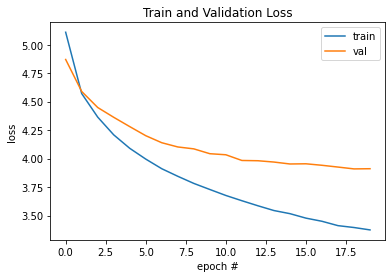

In [ ]:
# ORIGINAL
#### here is pasted, the most basic version 
import os
encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = padding_idx,
    device = device,
    augmentation_type = 'seqmix',
    gamma = 0.10
)

# Case 1: dissimilar
model, losses, bleus, which = train(dls,
    False, ## similarity
    encoder,
    mt_train_ds, 
    mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device = device,
    augmentation_type = 'seqmix',
    epochs = 20, hidden_size = hidden_size,
    lr = 0.001, weight_decay = 1*10**(-4),
    padding_idx = PADDING_IDX,
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = PARENT_DIR + 'seq2seq_modelk2dis/'
)

pd.DataFrame(losses).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

# SAVE THE BEST
torch.save(model, PARENT_DIR + 'k2disbest')
print('Best model saved')

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text)
bleu

0.0587313212454319

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text, max_n = 1, weights=[1])
bleu

0.3413642346858978

### RUN WITH RESET MIX_DL

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/seq2seq_modelk2dis/ contains ['epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19']
continuing anyways... some files may be overwritten


epoch 0: training loss = 5.09237 - validation loss = 4.84392 - validation bleu = 0.01567


epoch 1: training loss = 4.56955 - validation loss = 4.59793 - validation bleu = 0.03661


epoch 2: training loss = 4.3574 - validation loss = 4.4467 - validation bleu = 0.02815


epoch 3: training loss = 4.20575 - validation loss = 4.33661 - validation bleu = 0.0384


epoch 4: training loss = 4.08725 - validation loss = 4.25039 - validation bleu = 0.0377


epoch 5: training loss = 3.99059 - validation loss = 4.1885 - validation bleu = 0.03415


epoch 6: training loss = 3.90688 - validation loss = 4.12712 - validation bleu = 0.03419


epoch 7: training loss = 3.83768 - validation loss = 4.10687 - validation bleu = 0.04347


epoch 8: training loss = 3.77203 - validation loss = 4.05675 - validation bleu = 0.04121


epoch 9: training loss = 3.72079 - validation loss = 4.03845 - validation bleu = 0.04271


epoch 10: training loss = 3.66897 - validation loss = 4.02402 - validation bleu = 0.04839


epoch 11: training loss = 3.62463 - validation loss = 4.02615 - validation bleu = 0.05949


epoch 12: training loss = 3.58482 - validation loss = 3.98914 - validation bleu = 0.04264


epoch 13: training loss = 3.54164 - validation loss = 3.98071 - validation bleu = 0.05274


epoch 14: training loss = 3.50079 - validation loss = 3.97564 - validation bleu = 0.04796


epoch 15: training loss = 3.47272 - validation loss = 3.97488 - validation bleu = 0.0507


epoch 16: training loss = 3.44045 - validation loss = 3.96819 - validation bleu = 0.05638


epoch 17: training loss = 3.41181 - validation loss = 3.96221 - validation bleu = 0.05439


epoch 18: training loss = 3.37811 - validation loss = 3.94544 - validation bleu = 0.04815


epoch 19: training loss = 3.35401 - validation loss = 3.94089 - validation bleu = 0.04983
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/seq2seq_modelk2dis/epoch11
Best model saved


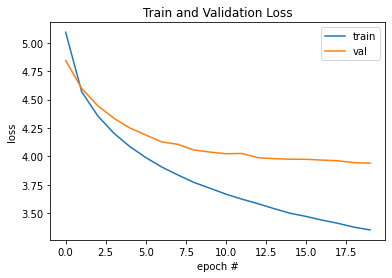

In [20]:
# NEW
#### here is pasted, the most basic version 
import os
encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = padding_idx,
    device = device,
    augmentation_type = 'seqmix',
    gamma = 0.10
)

# Case 1: dissimilar
model, losses, bleus, which = train(dls,
    False, ## similarity
    encoder,
    mt_train_ds, 
    mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device = device,
    augmentation_type = 'seqmix',
    epochs = 20, hidden_size = hidden_size,
    lr = 0.001, weight_decay = 1*10**(-4),
    padding_idx = PADDING_IDX,
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = PARENT_DIR + 'seq2seq_modelk2dis/'
)

pd.DataFrame(losses).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

# SAVE THE BEST
torch.save(model, PARENT_DIR + 'k2disbest')
print('Best model saved')

In [21]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text)
bleu

0.04978540539741516

In [22]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text, max_n = 1, weights=[1])
bleu

0.3166116178035736

## Case 2: similar

creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/seq2seq_modelk2sim/


epoch 0: training loss = 5.11187 - validation loss = 4.88166 - validation bleu = 0.01004


epoch 1: training loss = 4.57568 - validation loss = 4.61526 - validation bleu = 0.03216


epoch 2: training loss = 4.34337 - validation loss = 4.43639 - validation bleu = 0.03306


epoch 3: training loss = 4.18867 - validation loss = 4.33185 - validation bleu = 0.03225


epoch 4: training loss = 4.06504 - validation loss = 4.25337 - validation bleu = 0.03432


epoch 5: training loss = 3.97132 - validation loss = 4.18207 - validation bleu = 0.03566


epoch 6: training loss = 3.88576 - validation loss = 4.13824 - validation bleu = 0.03494


epoch 7: training loss = 3.81769 - validation loss = 4.09774 - validation bleu = 0.04289


epoch 8: training loss = 3.75321 - validation loss = 4.06959 - validation bleu = 0.04775


epoch 9: training loss = 3.69962 - validation loss = 4.0479 - validation bleu = 0.04379


epoch 10: training loss = 3.64572 - validation loss = 4.00643 - validation bleu = 0.04931


epoch 11: training loss = 3.59977 - validation loss = 4.01342 - validation bleu = 0.04749


epoch 12: training loss = 3.55684 - validation loss = 3.97615 - validation bleu = 0.04382


epoch 13: training loss = 3.51751 - validation loss = 3.99092 - validation bleu = 0.05568


epoch 14: training loss = 3.48653 - validation loss = 3.96266 - validation bleu = 0.05075


epoch 15: training loss = 3.45027 - validation loss = 3.97202 - validation bleu = 0.05447


epoch 16: training loss = 3.42102 - validation loss = 3.95357 - validation bleu = 0.05119


epoch 17: training loss = 3.38651 - validation loss = 3.94252 - validation bleu = 0.04556


epoch 18: training loss = 3.36317 - validation loss = 3.94962 - validation bleu = 0.05042


epoch 19: training loss = 3.3355 - validation loss = 3.94836 - validation bleu = 0.05385
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/seq2seq_modelk2sim/epoch13
Best model saved


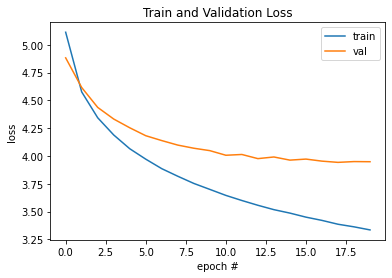

In [ ]:
#### here is pasted, the most basic version 
import os
encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = padding_idx,
    device = device,
    augmentation_type = 'seqmix',
    gamma = 0.10
)

# Case 2: similar
model, losses, bleus, which = train(dls,
    True, ## similarity
    encoder,
    mt_train_ds, 
    mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device = device,
    augmentation_type = 'seqmix',
    epochs = 20, hidden_size = hidden_size,
    lr = 0.001, weight_decay = 1*10**(-4),
    padding_idx = PADDING_IDX,
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = PARENT_DIR + 'seq2seq_modelk2sim/'
)

pd.DataFrame(losses).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

# SAVE THE BEST
torch.save(model, PARENT_DIR + 'k2simbest')
print('Best model saved')

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text)
bleu

0.060926567763090134

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text, max_n = 1, weights=[1])
bleu

0.35024234652519226

# 2nd run

## Case 1: Dissimilar

In [ ]:
#### here is pasted, the most basic version 
import os
encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = padding_idx,
    device = device,
    augmentation_type = 'seqmix',
    gamma = 0.10
)

# Case 1: dissimilar
model, losses, bleus, which = train(dls,
    False, ## similarity
    encoder,
    mt_train_ds, 
    mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device = device,
    augmentation_type = 'seqmix',
    epochs = 21, hidden_size = hidden_size,
    lr = 0.0005, weight_decay = 1*10**(-6),
    padding_idx = PADDING_IDX,
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = 'seq2seq_models3'
)

pd.DataFrame(losses).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

creating directory seq2seq_models3


epoch 0: training loss = 5.18916 - validation loss = 5.30017 - validation bleu = 0.00811


epoch 1: training loss = 4.73121 - validation loss = 4.9585 - validation bleu = 0.00428


epoch 2: training loss = 4.4745 - validation loss = 4.71736 - validation bleu = 0.00764


epoch 3: training loss = 4.25901 - validation loss = 4.57646 - validation bleu = 0.01531


epoch 4: training loss = 4.08407 - validation loss = 4.46314 - validation bleu = 0.02842


epoch 5: training loss = 3.92941 - validation loss = 4.40071 - validation bleu = 0.03253


epoch 6: training loss = 3.77301 - validation loss = 4.3611 - validation bleu = 0.03682


epoch 7: training loss = 3.6319 - validation loss = 4.3386 - validation bleu = 0.04065


epoch 8: training loss = 3.50377 - validation loss = 4.33701 - validation bleu = 0.03837


epoch 9: training loss = 3.3585 - validation loss = 4.32572 - validation bleu = 0.02542


epoch 10: training loss = 3.23396 - validation loss = 4.31136 - validation bleu = 0.03604


epoch 11: training loss = 3.11036 - validation loss = 4.31518 - validation bleu = 0.03937


 72%|███████▏  | 1704/2356 [00:16<00:05, 109.27it/s]

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text)
bleu

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text, max_n = 1, weights=[1])
bleu

## Case 2: similar

In [ ]:
#### here is pasted, the most basic version 
import os
encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = padding_idx,
    device = device,
    augmentation_type = 'seqmix',
    gamma = 0.10
)

# Case 2: similar
model, losses, bleus, which = train(dls,
    True, ## similarity
    encoder,
    mt_train_ds, 
    mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device = device,
    augmentation_type = 'seqmix',
    epochs = 21, hidden_size = hidden_size,
    lr = 0.0005, weight_decay = 1*10**(-6),
    padding_idx = PADDING_IDX,
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = 'seq2seq_models3'
)

pd.DataFrame(losses).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text)
bleu

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, eos_idx = EOS_IDX, bos_idx = BOS_IDX)
bleu = bleu_score(candidate_text, reference_text, max_n = 1, weights=[1])
bleu